# **SYMBOLIC MACHINE LEARNING - FULL RESOLUTION DATA**



---



***INSTALL GDAL :***

In [1]:
!pip install gdal
!pip install rasterio
!pip install wget

     |████████████████████████████████| 15.2MB 164kB/s 
  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=54b805fa5d6e789c62ce3e9b36229a990da16843b365ea905d6ee008da539683
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


***MOUNT DRIVE ON GOOGLE COLLABORATORY :***


In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#DOWNLOAD CORINE LAND COVER DATASET
!wget https://land.copernicus.eu/land-files/7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip
!unzip /content/7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip
!unzip /content/clc2018_clc2018_v2018_20_raster100m.zip



--2019-12-05 02:00:07--  https://land.copernicus.eu/land-files/7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip
Resolving land.copernicus.eu (land.copernicus.eu)... 34.247.152.136
Connecting to land.copernicus.eu (land.copernicus.eu)|34.247.152.136|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 221703454 (211M) [application/zip]
Saving to: ‘7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip’

7ac95361f9ac3cecdf3 100%[===================>] 211.43M  27.6MB/s    in 8.3s    

2019-12-05 02:00:16 (25.4 MB/s) - ‘7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip’ saved [221703454/221703454]

Archive:  /content/7ac95361f9ac3cecdf37785bc183ff02dd765a16.zip
 extracting: clc2018_clc2018_v2018_20_raster100m.zip  
Archive:  /content/clc2018_clc2018_v2018_20_raster100m.zip
  inflating: clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.txt  
  inflating: clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif  
  inflating: clc2018_clc2018_v2018_20_raster100m/CLC2018_C

In [4]:
!pip install sentinelsat
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date


api = SentinelAPI('username', 'password',api_url='https://scihub.copernicus.eu/apihub')
api.download('e277e5c7-2bae-4fd6-a922-a6c68c60b1cf')


!unzip -q "./S2A_MSIL1C_20190613T101031_N0207_R022_T32TQQ_20190613T121346.zip"

!gdal_translate  '/content/S2A_MSIL1C_20190613T101031_N0207_R022_T32TQQ_20190613T121346.SAFE/GRANULE/L1C_T32TQQ_A020754_20190613T101027/IMG_DATA/T32TQQ_20190613T101031_TCI.jp2' tci.tif

!gdal_translate -of JPEG -co QUALITY=90 -co PROGRESSIVE=ON -outsize 1000 1000 -r bilinear tci.tif X-display.jpg

!gdalwarp -t_srs "EPSG:3035" 'tci.tif' 'X.tif'


Downloading: 100%|██████████| 844M/844M [00:29<00:00, 28.2MB/s]
MD5 checksumming: 100%|██████████| 844M/844M [00:01<00:00, 436MB/s]


Input file size is 10980, 10980
0...10...20...30...40...50...60...70...80...90...100 - done.
Input file size is 10980, 10980
0...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 11135P x 11075L.
Processing input file tci.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.


In [0]:
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 10980 10980 -r bilinear X.tif X-big.tif

In [6]:
!gdalwarp -te 4441273.811229076 2336609.946413303 4552478.26761615 2447215.1870497502 '/content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif' 'Y.tif'

Creating output file that is 1112P x 1106L.
Processing input file /content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif.
Using internal nodata values (e.g. -32768) for image /content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif.
Copying nodata values from source /content/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif to destination Y.tif.
0...10...20...30...40...50...60...70...80...90...100 - done.


In [0]:
!gdal_translate -co QUALITY=100 -co PROGRESSIVE=ON -outsize 10980 10980 -r bilinear 'Y.tif' 'Y-big.tif'

In [0]:
!gdal_translate -of JPEG -co QUALITY=90 -co PROGRESSIVE=ON -outsize 1000 1000 -r bilinear Y-big.tif Y-display.jpg



---



***IMPORT PACKAGES :***

In [0]:
import gdal
from gdalconst import GA_ReadOnly 
import matplotlib.pyplot as plt
%matplotlib inline 
import cv2
import numpy as np
from collections import Counter
from tqdm import tqdm_notebook as tqdm
IMG_SIZE=10980
import rasterio
from rasterio.plot import show



---



**PORTO VIRO REGION (ITALY)**

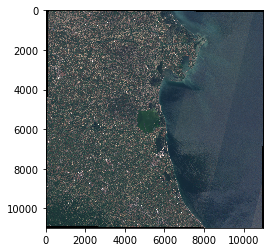

In [3]:
dataset = rasterio.open('X-big.tif')
show(dataset.read([1,2,3]))

 ***3 CLASSES :
 BLACK = BUILT UP AREA , 
 WHITE = RIVER/WATER BODIES , 
 OTHER COLORS = OTHER OBJECTS***


In [0]:
#IMPORT SENTNEL IMAGE OF MANNHEIM AREA - INPUT DATA
tif1=gdal.Open('X-big.tif')
rband = tif1.GetRasterBand(1).ReadAsArray()
gband = tif1.GetRasterBand(2).ReadAsArray()
bband = tif1.GetRasterBand(3).ReadAsArray()


UNIQUE CLASSES:  [  0 125 255]


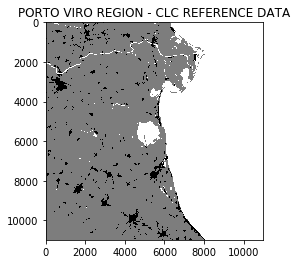

In [6]:
#IMPORT SENTNEL IMAGE OF MANNHEIM AREA-CORINE LAND COVER - REFERENCE DATA
tif2=gdal.Open('Y-big.tif')
Y_raster = tif2.GetRasterBand(1).ReadAsArray()

Y_raster[(Y_raster > 0)&(Y_raster <= 150)] = 0
Y_raster[(Y_raster > 150) & (Y_raster < 450)] = 125
Y_raster[(Y_raster >= 450) & (Y_raster < 530)] = 255
Y_raster[Y_raster > 530] = 125
Y_raster[Y_raster < 0] = 255


print("UNIQUE CLASSES: ", np.unique(Y_raster))
plt.gray()
plt.title('PORTO VIRO REGION - CLC REFERENCE DATA')
plt.imshow(Y_raster)
Y_list=Y_raster.flatten().tolist()




---



***STEP 1 : DATA QUANTIZATION-SEQUENCING***

In [0]:
#CONVERT RGB BANDS AS INPUT FEATURE SEQUENCES
#QUANTIZATION

rband_list=rband.flatten().tolist()
#rband_list = [round(x/8) for x in rband_list]

gband_list=gband.flatten().tolist()
#gband_list = [round(x/8) for x in gband_list]

bband_list=bband.flatten().tolist()
#bband_list = [round(x/8) for x in bband_list]


***SEQUENCE LIST AND ANTECEDENT-CONSEQUENT LIST(X->Y)***

In [0]:
sequences_list=[]
ante_consq_list=[]

In [9]:
for i in tqdm(range(len(rband_list))):
  sequences_list.append((rband_list[i],gband_list[i],bband_list[i]))
  ante_consq_list.append((rband_list[i],gband_list[i],bband_list[i],Y_list[i]))

print('BUILDING DATA DONE')



BUILDING DATA DONE


***RANDOM EXAMPLE - DATA STRUCTURE (R, G, B, CLASS_LABEL)***

In [10]:
print ((ante_consq_list[22222]))

(120, 113, 108, 125)


***FIND UNIQUE SEQUENCES(X-cap) AND COUNT***

In [11]:
print('UNIQUE SEQUENCES COUNT: ')
print(len(list(set(sequences_list))))
unique_X_sequences=list(set(sequences_list))

UNIQUE SEQUENCES COUNT: 
398184




---



***STEP 2:***

*   ***ASSOCIATION ANALYSIS***
*   ***EVIDENCE BASED NORMALIZED DIFFERENTIAL INDEX(ENDI) MEASURE***




***HELPER FUNCTIONS:***

In [0]:
#ONE VARIATION OF ENDI INTERESTINGNESS MEASURE
def calculate_ENDI(positive,negative):
  if (positive==0) and (negative==0) : return 0
  return (positive-negative)/(positive+negative)

In [0]:
#POSITIVE EVIDENCES
def positive_count(sequence,class_name):
  item = list(sequence)
  item.append(class_name)
  c=counter[tuple(item)]
  return c


#NEGATIVE EVIDENCES
def negative_count(sequence, class_list):
  negative_classcount=0
  for c in  class_list:
    item = list(sequence)
    item.append(c)
    negative_classcount=negative_classcount+counter[tuple(item)]

  return negative_classcount



In [0]:
#COUNT FREQUENCIES OF EACH UNIQUE SEQUENCE
counter=Counter(ante_consq_list)

***CALCULATE ENDI MEASURE FOR ALL THE CLASSES PER SEQUENCE DATA***

In [15]:
#GENERATE A DICTIONARY OF THE FORM : {(unique sequence) : [ENDI MEASURE-CLASS 0, ENDI MEASURE-CLASS 1, ENDI MEASURE-CLASS 2 ]}
ENDI_table_dictionary={}

for i in tqdm(range(len(unique_X_sequences))):
  seq=unique_X_sequences[i]
  ENDI_class_0=calculate_ENDI(positive_count(seq,0),negative_count(seq,[125,255]))
  ENDI_class_1=calculate_ENDI(positive_count(seq,125),negative_count(seq,[0,255]))
  ENDI_class_2=calculate_ENDI(positive_count(seq,255),negative_count(seq,[0,125]))
  ENDI_table_dictionary[seq]=[ENDI_class_0,ENDI_class_1,ENDI_class_2]

print('BUILDING DICTIONARY DONE')

#PRINT RANDOM DATA POINT
#print(ENDI_table_dictionary[unique_X_sequences[5000]])



BUILDING DICTIONARY DONE




---



***STEP 3 : CLASSIFICATION AND VISUALIZATION***

In [0]:
def classification(file_name):
          new_image=gdal.Open(file_name)
          rband_new = new_image.GetRasterBand(1).ReadAsArray()
          gband_new = new_image.GetRasterBand(2).ReadAsArray()
          bband_new = new_image.GetRasterBand(3).ReadAsArray()

          rband_list_new=rband_new.flatten().tolist()
          gband_list_new=gband_new.flatten().tolist()
          bband_list_new=bband_new.flatten().tolist()

          #rband_list_new = [round(x/8) for x in rband_list_new]
          #gband_list_new = [round(x/8) for x in gband_list_new]
          #bband_list_new = [round(x/8) for x in bband_list_new]


          final_pred_list=[]

          for i in tqdm(range(len(rband_list_new))):

            if ((rband_list_new[i],gband_list_new[i],bband_list_new[i])) in ENDI_table_dictionary:
                  ENDI_vals=ENDI_table_dictionary[(rband_list_new[i],gband_list_new[i],bband_list_new[i])]
                  max_val = max(ENDI_vals)
                  index_max = ENDI_vals.index(max_val)
                  final_pred_list.append(index_max)   
            else:
              final_pred_list.append(1)
          return final_pred_list



In [0]:
def visualization(prediction_list):
  numpy_array=np.asarray(prediction_list)
  numpy_array[numpy_array == 1] = 125
  numpy_array[numpy_array == 2] = 255
  final_image_array=numpy_array.reshape((IMG_SIZE,IMG_SIZE))
  print(np.unique(final_image_array))
  plt.gray()
  plt.title('PORTO VIRO REGION - CLASSIFICATION RESULTS')
  plt.imshow(final_image_array)
  plt.savefig('classification-result.png')
  cv2.imwrite("classication-result.tif", final_image_array)



In [0]:
def metrics(y_actual, y_pred_original):
    numpy_array=np.asarray(y_pred_original)
    numpy_array[numpy_array == 1] = 125
    numpy_array[numpy_array == 2] = 255
    y_pred=numpy_array.tolist()
    class_id = set(y_actual).union(set(y_pred))
    TP = []
    FP = []
    TN = []
    FN = []

    for index ,_id in enumerate(class_id):
        TP.append(0)
        FP.append(0)
        TN.append(0)
        FN.append(0)
        for i in tqdm(range(len(y_pred))):
            if y_actual[i] == y_pred[i] == _id:
                TP[index] += 1
            if y_pred[i] == _id and y_actual[i] != y_pred[i]:
                FP[index] += 1
            if y_actual[i] == y_pred[i] != _id:
                TN[index] += 1
            if y_pred[i] != _id and y_actual[i] != y_pred[i]:
                FN[index] += 1


    return class_id,TP, FP, TN, FN



---



**VISUALIZATION OF RESULTS AND METRICS - PORTO VIRO AREA(ITALY)**

1) PORTO VIRO CLASSIFICATION RESULTS


[  0 125 255]


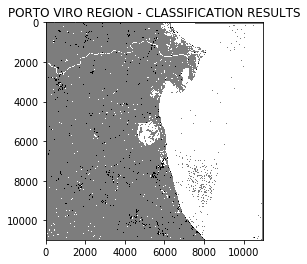

In [19]:
prediction_list=classification('X-big.tif')
visualization(prediction_list)

In [20]:
m=metrics(Y_list,prediction_list)

In [0]:
unique, counts = np.unique(Y_list, return_counts=True)

In [22]:
for i in range(0,3):
  TP=m[1][i]
  FP=m[2][i]
  TN=m[3][i]
  FN=m[4][i]
  P=counts[i]
  N=len(Y_list)-P
  TPR=TP/P
  TNR=TN/N
  bal_measure = (TPR+TNR)/2
  inf_accuracy=TPR-TNR
  print('BALANCED ACCURACY FOR CLASS '+str(i)+" is "+ str(bal_measure))
  print('INFORMEDNESS FOR CLASS '+str(i)+" is "+str(inf_accuracy))




BALANCED ACCURACY FOR CLASS 0 is 0.5829923728200419
INFORMEDNESS FOR CLASS 0 is -0.7616011825821705
BALANCED ACCURACY FOR CLASS 1 is 0.9351098837429114
INFORMEDNESS FOR CLASS 1 is 0.0825503964809311
BALANCED ACCURACY FOR CLASS 2 is 0.9404312444065627
INFORMEDNESS FOR CLASS 2 is 0.013444690449306185


2) PORTO VIRO RGB IMAGE

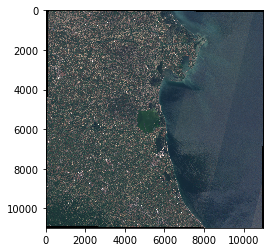

In [23]:
dataset = rasterio.open('X-big.tif')
show(dataset.read([1,2,3]))



---

